In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Clean Youth Exposure and College Enrollment Data

In [2]:
# Load csv files
childhood_violent_crime_to_load = "../raw_data/Children-in-households-with-violent-crime_2014_0731_1400.csv"
college_enrollment_to_load = "../raw_data/userssharedsdfperc18to24yoenrld24ycsre20002012.csv"

# Create dataframes
childhood_violent_crime = pd.read_csv(childhood_violent_crime_to_load)
college_enrollment = pd.read_csv(college_enrollment_to_load)

In [3]:
# Remove grand total, total for males, and total for females from this analysis
childhood_violent_crime_cleaned = childhood_violent_crime.dropna(subset = ["Sex", "Race/ethnicity"])
college_enrollment_cleaned = college_enrollment.dropna(subset = ["Sex", "Race/ethnicity"])

# Remove unwanted columns (i.e. Footnote, Note on Percent, Note on Count)
childhood_violent_crime_reduced = childhood_violent_crime_cleaned[["Race/ethnicity", "Sex", "Year",
                                                                  "Type of violent crime", "Percentage",
                                                                  "Standard Error on Percentage", "Count", 
                                                                  "Standard Error on Count"]]
college_enrollment_reduced = college_enrollment_cleaned[["Race/ethnicity", "Sex", "Year", "Percentage", 
                                                         "Standard Error on Percentage", "Count (in thousands)", 
                                                         "Standard Error on Count (in thousands)"]]

In [4]:
# Merge two dataframes on race, sex, and year
child_crime_college_enrol = pd.merge(college_enrollment_reduced, childhood_violent_crime_reduced, 
                                     on = ["Race/ethnicity", "Sex", "Year"])

# Rename columns to reflect the data they represent
child_crime_college_enrol = child_crime_college_enrol.rename(columns = {"Percentage_x":"per_college_enroll", 
                                                                        "Standard Error on Percentage_x":"SE_college_enroll", 
                                                                       "Count (in thousands)":"college_enroll_count_thousands",
                                                                       "Standard Error on Count (in thousands)":"SE_college_enroll_count",
                                                                       "Percentage_y":"per_youth_crime_exposure",
                                                                       "Standard Error on Percentage_y":"SE_per_youth_crime_exposure",
                                                                       "Count":"youth_crime_exposure_count",
                                                                       "Standard Error on Count":"SE_youth_crime_exposure_count"})

In [5]:
# Remove count data as we will focus on percent 
for_data_analysis = child_crime_college_enrol[["Race/ethnicity", "Sex", "Year", "per_college_enroll", 
                                               "SE_college_enroll", "SE_per_youth_crime_exposure", 
                                               "per_youth_crime_exposure", "Type of violent crime"]]

# Remove '%' from the percent college enrollment column
for_data_analysis["per_college_enroll"] = for_data_analysis.per_college_enroll.str.replace('%', '').astype(float)

# Print head (check data)
for_data_analysis.head()

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Race/ethnicity,Sex,Year,per_college_enroll,SE_college_enroll,SE_per_youth_crime_exposure,per_youth_crime_exposure,Type of violent crime
0,"White, non-Hispanic",Male,2000,36.2,0.79,0.6,6.7,Violent crime
1,"White, non-Hispanic",Male,2000,36.2,0.79,0.3,2.0,Serious violent crime
2,"White, non-Hispanic",Male,2000,36.2,0.79,0.5,5.0,Simple assault
3,"White, non-Hispanic",Male,2001,37.2,0.79,0.5,5.2,Violent crime
4,"White, non-Hispanic",Male,2001,37.2,0.79,0.2,1.6,Serious violent crime


In [6]:
# Create csv file
for_data_analysis.to_csv("../cleaned_data/college_and_crime_cleaned_data.csv", index=False)

## Playing with Youth Exposure Data

In [16]:
# Load data and convert to a dataframe
data_analysis_to_load = "../cleaned_data/college_and_crime_cleaned_data.csv"

data_analysis = pd.read_csv(data_analysis_to_load)

In [17]:
# Group by type of crime and by year
types_of_crime_year = data_analysis.groupby(["Type of violent crime", "Year"]).mean()

In [18]:
# Transpose the table so that each type of crime is a column
by_year_types = pd.pivot_table(types_of_crime_year, index=['Year'], 
                               columns = "Type of violent crime")

# Create a dataframe with only the mean percent of youth exposure
rate_by_year_types = by_year_types["per_youth_crime_exposure"]

# Reset the index
rate_by_year_types = rate_by_year_types.reset_index()

# Print head (check data)
rate_by_year_types.head()

Type of violent crime,Year,Serious violent crime,Simple assault,Violent crime
0,2000,2.633333,4.900000,7.066667
1,2001,2.500000,4.216667,6.383333
2,2002,2.066667,3.733333,5.516667
3,2003,5.612500,7.362500,11.062500
4,2004,1.657143,5.514286,6.062500


In [19]:
# Create a dataframe with only the standard error for percent youth exposure
se_rate_by_year_types = by_year_types["SE_per_youth_crime_exposure"]

# Reset the index
se_rate_by_year_types = se_rate_by_year_types.reset_index()

# Print head (check data)
se_rate_by_year_types.head()

Type of violent crime,Year,Serious violent crime,Simple assault,Violent crime
0,2000,0.466667,0.683333,0.900
1,2001,0.450000,0.600000,0.800
2,2002,0.416667,0.600000,0.800
3,2003,1.525000,1.712500,2.125
4,2004,0.485714,1.171429,1.275


In [23]:
# List of the years for the x-axis
x_axis_by_year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

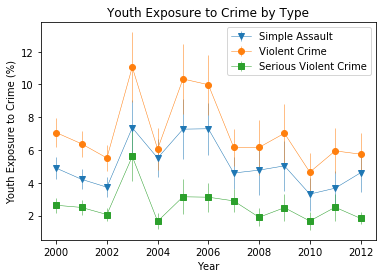

In [24]:
# Create the plot area
fig, ax = plt.subplots()

# Plot the mean and standard error for type of crime youth were exposed to based on year
ax.errorbar(x_axis_by_year, rate_by_year_types["Simple assault"], 
            se_rate_by_year_types["Simple assault"], linewidth = 0.5, marker = "v", 
            label = "Simple Assault")
ax.errorbar(x_axis_by_year, rate_by_year_types["Violent crime"], 
            se_rate_by_year_types["Violent crime"], linewidth = 0.5, marker = "o", 
            label = "Violent Crime")
ax.errorbar(x_axis_by_year, rate_by_year_types["Serious violent crime"], 
            se_rate_by_year_types["Serious violent crime"], linewidth = 0.5, marker = "s", 
            label = "Serious Violent Crime")

# Set the x-axis range
#ax.set_ylim(15, 65)

# Label the x- and y-axes
ax.set_xlabel("Year")
ax.set_ylabel("Youth Exposure to Crime (%)")

# Label the graph
ax.set_title("Youth Exposure to Crime by Type")

# Place the legend in the best place on the plot and make the font readable
plt.legend(loc = "upper right", fontsize = "medium")

# Save the graph
plt.savefig("../png_files/youth_exposure_by_crime_type.png")

In [26]:
# Group by type of crime and by year
types_of_crime_sex = data_analysis.groupby(["Type of violent crime", "Sex"]).mean()

In [27]:
# Transpose the table so that each type of crime is a column
by_sex_types = pd.pivot_table(types_of_crime_sex, index=["Type of violent crime"], 
                               columns = "Sex")

# Create a dataframe with only the mean percent of youth exposure
rate_by_sex_types = by_sex_types["per_youth_crime_exposure"]

# Reset the index
rate_by_sex_types = rate_by_sex_types.reset_index()

# Print head (check data)
rate_by_sex_types.head()

Sex,Type of violent crime,Female,Male
0,Serious violent crime,3.254348,2.106522
1,Simple assault,5.704082,4.579167
2,Violent crime,8.379592,5.885714


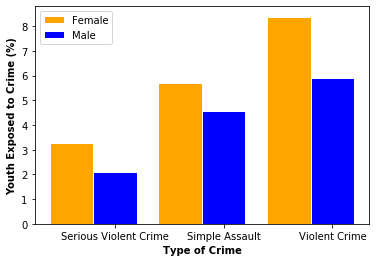

In [28]:
barWidth = 0.4

# set height of bar
bars1 = rate_by_sex_types["Female"]
bars2 = rate_by_sex_types["Male"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color = "orange", width = barWidth, edgecolor = "white", 
        label = "Female")
plt.bar(r2, bars2, color = "blue", width = barWidth, edgecolor = "white", 
        label = "Male")

# Add xticks on the middle of the group bars
plt.ylabel("Youth Exposed to Crime (%)", fontweight = "bold")
plt.xlabel("Type of Crime", fontweight = "bold")
plt.xticks([r + barWidth for r in range(len(bars1))], ["Serious Violent Crime", 
                                                       "Simple Assault", "Violent Crime"])
 
# Create legend & Show graphic
plt.legend()

# Save the graph
plt.savefig("../png_files/youth_exposed_by_sex.png")

In [29]:
# Group by type of crime and by year
types_of_crime_race = data_analysis.groupby(["Type of violent crime", "Race/ethnicity"]).mean()

In [30]:
# Transpose the table so that each type of crime is a column
by_race_types = pd.pivot_table(types_of_crime_race, index=["Type of violent crime"], 
                               columns = "Race/ethnicity")

# Create a dataframe with only the mean percent of youth exposure
rate_by_race_types = by_race_types["per_youth_crime_exposure"]

# Reset the index
rate_by_race_types = rate_by_race_types.reset_index()

# Print head (check data)
rate_by_race_types.head()

Race/ethnicity,Type of violent crime,"Black, non-Hispanic",Hispanic,"Two or more races, non-Hispanic","White, non-Hispanic"
0,Serious violent crime,2.484615,2.092308,6.100000,1.623077
1,Simple assault,3.730769,3.207692,11.568421,3.811538
2,Violent crime,5.869231,5.103846,13.970000,5.165385


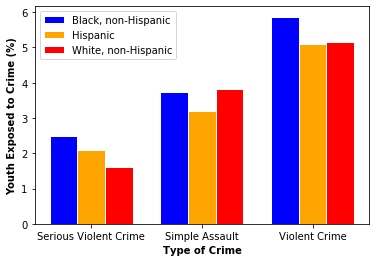

In [31]:
barWidth = 0.25

# set height of bar
bars1 = rate_by_race_types["Black, non-Hispanic"]
bars2 = rate_by_race_types["Hispanic"]
bars3 = rate_by_race_types["White, non-Hispanic"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color = "blue", width = barWidth, edgecolor = "white", 
        label = "Black, non-Hispanic")
plt.bar(r2, bars2, color = "orange", width = barWidth, edgecolor = "white", 
        label = "Hispanic")
plt.bar(r3, bars3, color = "red", width = barWidth, edgecolor = "white", 
        label = "White, non-Hispanic")

# Add xticks on the middle of the group bars
plt.ylabel("Youth Exposed to Crime (%)", fontweight = "bold")
plt.xlabel("Type of Crime", fontweight = "bold")
plt.xticks([r + barWidth for r in range(len(bars1))], ["Serious Violent Crime", 
                                                       "Simple Assault", "Violent Crime"])
 
# Create legend & Show graphic
plt.legend()

# Save the graph
plt.savefig("../png_files/youth_exposed_by_race.png")

## Clean Imprisonment Data

In [32]:
# Read in the raw data and look at it.
imprisonment_rates_file = "../raw_data/imprisonment_rates_of_18_24_yos_2000_2012.csv"

imprisionment_rates_df = pd.read_csv(imprisonment_rates_file)

imprisionment_rates_df.head()

,Characteristic,Sex,Race/ethnicity,Year,"Rate per 100,000",Count
0,Total,NaN,NaN,2000,791,218896
1,Total,NaN,NaN,2001,777,219439
2,Total,NaN,NaN,2002,766,220072
3,Total,NaN,NaN,2003,750,218436
4,Total,NaN,NaN,2004,707,207416


In [33]:
# Race/Ethnicity a duplicate of Characteristic, drop it.

imprisonment_df = imprisionment_rates_df
imprisonment_df = imprisonment_df.drop(['Race/ethnicity'], axis=1)


imprisonment_df.head(50)

,Characteristic,Sex,Year,"Rate per 100,000",Count
0,Total,NaN,2000,791,218896
1,Total,NaN,2001,777,219439
2,Total,NaN,2002,766,220072
3,Total,NaN,2003,750,218436
4,Total,NaN,2004,707,207416
5,Total,NaN,2005,680,200050
6,Total,NaN,2006,663,196234
7,Total,NaN,2007,662,197731
8,Total,NaN,2008,658,199105
9,Total,NaN,2009,660,201325


In [34]:
# Fill in NaNs for Sex column.  NaNs are both.
imprisonment_df['Sex'] = imprisonment_df['Sex'].fillna("MF")
imprisonment_df.head()

,Characteristic,Sex,Year,"Rate per 100,000",Count
0,Total,MF,2000,791,218896
1,Total,MF,2001,777,219439
2,Total,MF,2002,766,220072
3,Total,MF,2003,750,218436
4,Total,MF,2004,707,207416


In [35]:
imprisonment_df["Characteristic"].unique()

array(['Total', 'Total - Male', 'Total - Female',
       'Total - White, non-Hispanic', 'Total - Black, non-Hispanic',
       'Total - Hispanic', 'Total - Other race, non-Hispanic',
       'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic',
       'Other race, non-Hispanic'], dtype=object)

In [36]:
imprisonment_df.describe()

,Year,"Rate per 100,000",Count
count,195.000000,195.000000,195.000000
mean,2006.000000,921.374359,54568.902564
std,3.751288,1033.971778,63418.156827
min,2000.000000,41.000000,869.000000
25%,2003.000000,123.500000,4726.000000
50%,2006.000000,644.000000,45219.000000
75%,2009.000000,1306.500000,76078.500000
max,2012.000000,5358.000000,220072.000000


In [37]:
# This gets all races and both sexs
try:
    output_data_file = "../cleaned_data/Cleaned_Imprisonment_Rates.csv"
    imprisonment_df.to_csv(output_data_file)
except:
    print(f"Unable to write file: {output_data_file}")